<a href="https://colab.research.google.com/github/WilliamShengYangHuang/AALU_Coding/blob/main/Image_Processing_UCL_East_mod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Image Processing UCL East**

In [41]:
import cv2 as cv
import numpy as np
from skimage.io import imread, imshow
import matplotlib.pyplot as plt
from matplotlib.pyplot import imread, imshow, subplots

from google.colab import drive

## Load base and edge images

In [44]:
drive.mount('/content/drive')

base_img_path = '/content/drive/My Drive/tp/test/base.jpg' #@param{type:'string'}
edge_img_path = '/content/drive/My Drive/tp/test/1.jpg' #@param{type:'string'}

base_img = imread(base_img_path)
edge_img = imread(edge_img_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Text(0.5, 1.0, 'Edge Image')

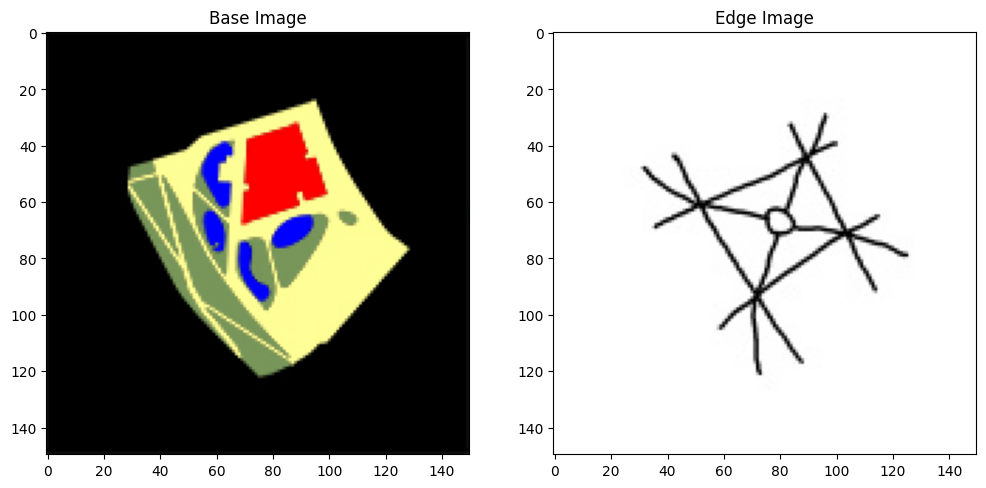

In [45]:
# Show the images
fig, axes = subplots( 1, 2, figsize=(12, 6))
axes[0].imshow(base_img)
axes[0].set_title('Base Image')
axes[1].imshow(edge_img)
axes[1].set_title('Edge Image')

## Process Edge Image

In [35]:
# Ensure edge image is grayscale
if len(edge_img.shape) == 3:
    edge_img = cv.cvtColor(edge_img, cv.COLOR_RGB2GRAY)

# Invert edge image to get black lines on white background
edge_img_inv = cv.bitwise_not(edge_img)

# Create a mask for black lines (edges)
black_line_mask = edge_img < 255

# Overlay edge image onto base image
overlay_img = cv.bitwise_and(base_img, base_img, mask=edge_img_inv)

## Define Intersection Percentage Calculation Method

In [36]:
def calculate_intersection_percentage(base_img, overlay_img, color_low, color_high, black_line_mask):
    # Check for color within range
    def is_color_in_range(pixel):
        return all(color_low[i] <= pixel[i] <= color_high[i] for i in range(3))

    # Create a mask for the specified color range
    color_mask = np.array([[is_color_in_range(pixel) for pixel in row] for row in base_img])

    # Find intersection between color mask and black lines
    intersection_mask = np.logical_and(color_mask, black_line_mask)

    # Calculate percentage
    total_black_line_pixels = np.sum(black_line_mask)
    if total_black_line_pixels == 0:
        return 0  # No black line pixels

    intersection_percentage = (np.sum(intersection_mask) / total_black_line_pixels) * 100
    return intersection_percentage

In [32]:
# Define color ranges (in RGB)
red_low, red_high = [200, 0, 0], [255, 50, 50]
blue_low, blue_high = [0, 0, 200], [50, 50, 255]
green_low, green_high = [0, 100, 0], [150, 255, 150]
yellow_low, yellow_high = [100, 100, 0], [255, 255, 150]

## Implement Percentage Calculations and Display Results

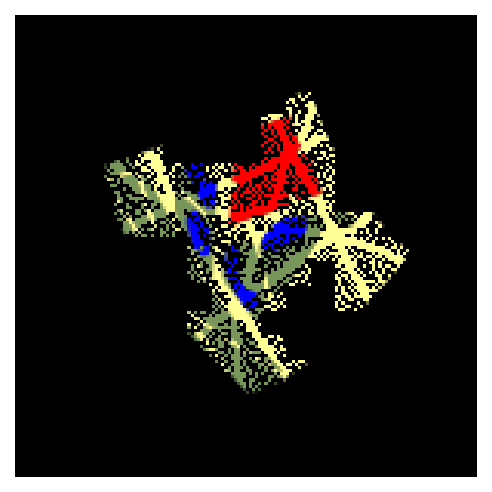

Percentage of black lines overlapping with red: 13.629402756508421%
Percentage of black lines overlapping with blue: 7.044410413476264%
Percentage of black lines overlapping with green: 25.612557427258803%
Percentage of black lines overlapping with yellow: 49.578866768759575%


In [49]:
# Calculate intersection percentages
percentage_red = calculate_intersection_percentage(base_img, overlay_img, red_low, red_high, black_line_mask)
percentage_blue = calculate_intersection_percentage(base_img, overlay_img, blue_low, blue_high, black_line_mask)
percentage_green = calculate_intersection_percentage(base_img, overlay_img, green_low, green_high, black_line_mask)
percentage_yellow = calculate_intersection_percentage(base_img, overlay_img, yellow_low, yellow_high, black_line_mask)

# Show overlay image
plt.figure(figsize=(4, 4), dpi=150)
plt.imshow(overlay_img)
plt.axis('off')
plt.show()

# Print results
print(f"Percentage of black lines overlapping with red: {percentage_red}%")
print(f"Percentage of black lines overlapping with blue: {percentage_blue}%")
print(f"Percentage of black lines overlapping with green: {percentage_green}%")
print(f"Percentage of black lines overlapping with yellow: {percentage_yellow}%")